## Welcome to Generative AI Self-Learning Notebook:

If you are not familiar with Colab IDE, we recommend you to watch this intro video:
https://www.youtube.com/watch?v=inN8seMm7UI

First step, make sure that you are connected to a Colab machine with GPU. Goto Runtime -> Change Runtime Type -> Hardware accelerator --> GPU --> T4
If done successfully, the below command would print a table

In [ ]:
!nvidia-smi

Sun Apr 30 18:06:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Note: **Execute cells one after other and do not skip any cells in a colab session**. You may need to repeat executing this cell if you are starting a new colab session. Because colab assigns new machines each time you start a new session.

## Install prerequisites

transformers, dataset - Huggingface libraries

Pytorch - The Machine Learning library

Langchain - The LLM chaining library

bitsandbytes - for Loading models in 8 bit

accelerate - optimized execution of AI inference and training

In [1]:
!pip install datasets transformers==4.28.0 numpy SentencePiece torch langchain bitsandbytes accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.9/709.9 kB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

# Introducing Hugging Face
Hugging Face is an AI community and Machine Learning platform created in 2016 by Julien Chaumond, Clément Delangue, and Thomas Wolf. It aims to democratize NLP by providing Data Scientists, AI practitioners, and Engineers immediate access to over 180,000 pre-trained models based on the state-of-the-art transformer architecture. 

https://huggingface.co/ is the new github for AI/ML

## Hugging Face Models

AI Models are pre-trained weights. Hugging face hosts thousands of pretrained models.
* **Text** in over 100 languages for performing tasks such as classification, 
information extraction, question answering, generation, generation, and translation. 
* **Speech**, for tasks such as object audio classification and speech recognition. 
* **Vision** for object detection, image classification, segmentation.
* **Tabular** data for regression and classification problems. 
* **Reinforcement Learning** transformers. 

https://huggingface.co/models - Explore models here.

In this notebook we have used some models from Hugging face.

## Datasets

The datasets library by Hugging Face is a collection of ready-to-use datasets and evaluation metrics for NLP. At the moment of writing this, the datasets hub counts over 30K different datasets. These datasets are used to traing the ML models. Access to these datasets are privided free of cost by HuggingFace.

https://huggingface.co/datasets

## Spaces

Build, host, and share your ML apps. Explore Spaces for Pre-built apps.

https://huggingface.co/spaces

## Transformers Library

Transformers provides APIs and tools to easily download and train state-of-the-art pretrained models. 

State-of-the-art Machine Learning for PyTorch, TensorFlow, and JAX.

Transformers support framework interoperability between PyTorch, TensorFlow, and JAX. This provides the flexibility to use a different framework at each stage of a model’s life; train a model in three lines of code in one framework, and load it for inference in another. Models can also be exported to a format like ONNX and TorchScript for deployment in production environments.

https://huggingface.co/docs/transformers/index

For most part of this notebook we will be using Transformers library for building examples

## Example 1: Conversing with an AI Model
This example is a few shot conversation. few shot is a way to tell the AI what we expect in the conversation by providing a sample conversation in the beginning and ask the AI to predict the next conversation. A way to trick the AI to give an answer we want.

The model used in this example is flan-t5-large.

Below are the key parameters used. You may see them repeating in the examples.

* tokenizer - prepares the text into ids that the model can understand and viceversa.
* return_tensors = "pt" - we request the tensor type to be pytorch (pt). The library supports other tensor formats as well. we stick to pt.
* max_length - The maximum number of tokens to be generated. Note: Tokens are not words. a word may be split into 2 or 3 tokens. For example, "Thoughtworks" in token terms may get shredded into "Thou" "ght" "wor" "ks".
* Skip_special_tokens - There are special tokens like <Pad> and <end> which are used to mask or mark the boundary of the response. We can ignore them in the decode process as we don't want them to be printed.

In [ ]:
from transformers import AutoTokenizer, T5ForConditionalGeneration
import torch

model_path = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_path)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = T5ForConditionalGeneration.from_pretrained(model_path).to(device)

input_text = """
ML Tutor: I am a ML/AI language model tutor
You: What is a language model?
ML Tutor: A language model is a statistical model that describes the probability of a word given the previous words.
You: What is a statistical model?
"""

input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)
output = model.generate(input_ids, max_length=512)
print(tokenizer.decode(output[0], skip_special_tokens=True))

ML Tutor: A statistical model is a model that describes the probability of a word given the previous words.


## Example 2: Role play
Now lets make the AI do a Role play in chat. We prefix the role prior to the chat conversation and AI will abide by the role.
We use the same flan-t5-large model loaded in the previous example.

In [ ]:
from transformers import AutoTokenizer, T5ForConditionalGeneration
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
input_text = """
The following is a conversation with an AI assistant. The assistant is helpful, creative, clever, and very friendly.

Human: Hello, who are you?
AI: I am an AI created by Thoughtworks. How can I help you today?
Human: I'd like to cancel my subscription.
AI:
"""
global_vars = globals()

# Check if 'model' is defined
if 'model' not in global_vars or model is None:
  model_path = "google/flan-t5-large"
  tokenizer = AutoTokenizer.from_pretrained(model_path)
  model = T5ForConditionalGeneration.from_pretrained(model_path).to(device)

input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)
output = model.generate(input_ids, max_length=512)
print(tokenizer.decode(output[0], skip_special_tokens=True))

I can help you with that.


## Example 3: Giving AI a task to complete.
Extract an address from the email. Prefix the task and then pass the context. The AI will do the rest.

Applications: Automation, data extraction

You can see that AI can do better than Regular Expressions.

In [ ]:
from transformers import AutoTokenizer, T5ForConditionalGeneration
import torch

input_text = """
Extract the mailing address from this email:
Dear Raju,
Thank you for the showing interest.
Here's my address KCT Tech Park, 1st Floor, Thudiyalur Rd, Saravanampatti, Coimbatore, Tamil Nadu 641049.

I found the course to be very useful.

Thanks,
Santhosh
"""
device = "cuda" if torch.cuda.is_available() else "cpu"
global_vars = globals()

if 'model' not in global_vars or model is None:
  model_path = "google/flan-t5-large"
  tokenizer = AutoTokenizer.from_pretrained(model_path)
  model = T5ForConditionalGeneration.from_pretrained(model_path).to(device)

input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)
output = model.generate(input_ids, max_length=512)
print(tokenizer.decode(output[0], skip_special_tokens=True))

KCT Tech Park, 1st Floor, Thudiyalur Rd, Saravanampatti, Coimbatore, Tamil Nadu 641049.


## Example 4: Generating MoM's

Summarize chat group conversations into MoMs. 

Note: The flan-t5-large model is a primitive model and may not generate great summaries. We can replace the same with Dolly v2 (databricks/dolly-v2-3b) kind of models which is explained in the later part of the notebook. You can keep this as an exercise port this example to use a dolly model and see how it summarizes.

In [ ]:
from transformers import AutoTokenizer, T5ForConditionalGeneration
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
input_text = """
Convert my short hand into a first-hand account of the meeting:

Raju: Profits up 50%
Santosh: New servers are online
Deepak: Need more time to fix software
Santosh: Happy to help
Jayachandran: Beta testing almost done
"""
global_vars = globals()

# Check if 'model' is defined
if 'model' not in global_vars or model is None:
  model_path = "google/flan-t5-large"
  tokenizer = AutoTokenizer.from_pretrained(model_path)
  model = T5ForConditionalGeneration.from_pretrained(model_path).to(device)

input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)
output = model.generate(input_ids, max_length=512)
print(tokenizer.decode(output[0], skip_special_tokens=True))

Santosh and Jayachandran are happy to help Deepak fix the software.


## Example 5: Write a Review


In [ ]:
from transformers import AutoTokenizer, T5ForConditionalGeneration
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
input_text = """
Write a restaurant review based on these notes:

Name: Green Banana Restaurant
Lobster great, noisy, service polite, prices high.

Review:
"""
global_vars = globals()

# Check if 'model' is defined
if 'model' not in global_vars or model is None:
  model_path = "google/flan-t5-large"
  tokenizer = AutoTokenizer.from_pretrained(model_path)
  model = T5ForConditionalGeneration.from_pretrained(model_path).to(device)

input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)
output = model.generate(input_ids, max_length=512)
print(tokenizer.decode(output[0], skip_special_tokens=True))

I've been to this restaurant a few times and it's always been good. The service is always good and the food is always good. The only thing that I don't like is the price. It's a little expensive for what you get.


## Example 6: Summarization


In [ ]:
from transformers import AutoTokenizer, T5ForConditionalGeneration
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
input_text = """
Summarize the following text: The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building, 
and the tallest structure in Paris. Its base is square, measuring 125 metres (410 ft) on each side. During its construction, 
the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world, 
a title it held for 41 years until the Chrysler Building in New York City was finished in 1930. 
It was the first structure to reach a height of 300 metres. Due to the addition of a broadcasting aerial 
at the top of the tower in 1957, it is now taller than the Chrysler Building by 5.2 metres (17 ft). 
Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the 
Millau Viaduct.
"""
global_vars = globals()

# Check if 'model' is defined
if 'model' not in global_vars or model is None:
  model_path = "google/flan-t5-large"
  tokenizer = AutoTokenizer.from_pretrained(model_path)
  model = T5ForConditionalGeneration.from_pretrained(model_path).to(device)

input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)
output = model.generate(input_ids, max_length=512)
print(tokenizer.decode(output[0], skip_special_tokens=True))

ModuleNotFoundError: ignored

## Example 7: Grammar Correction

We are switching to Dolly V2 model from flan model. Dolly is more capable than flan.

Goto Runtime --> Restart Runtime to flush the models already loaded. Otherwise you may get out of memory errors from CUDA.

Note: We are loading the model in 8bit to fit within colab memory

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_path = "databricks/dolly-v2-3b"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path, load_in_8bit=True, device_map="auto")
tokenizer.pad_token_id = tokenizer.eos_token_id

Overriding torch_dtype=None with `torch_dtype=torch.float16` due to requirements of `bitsandbytes` to enable model loading in mixed int8. Either pass torch_dtype=torch.float16 or don't pass this argument at all to remove this warning.


Note the change in prompting. Dolly model has been instruction tuned hence we post in this format. Ignore the hallucinations that appear after ### End token. We may strip response after End. Try that as an excercise.

In [ ]:
input_text = """
### Instruction:
Make this sentence grammatically correct.

She havent never been to the beach, but she wants learn how surf.

### Response:
"""

input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(model.device)
attention_mask = torch.ones_like(input_ids)

outputs = model.generate(input_ids, attention_mask=attention_mask, max_length=60)
print(tokenizer.decode(outputs[0]))

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



### Instruction:
Make this sentence grammatically correct.

She havent never been to the beach, but she wants learn how surf.

### Response:
She has never been to the beach, but she wants to learn how to surf.

### End
She has never been to the beach, but


## Example 8: Code Generation

Dolly v2 3B model that we have loaded earlier is not great at code generation. so if you want to try complex code generation we may need to go 7B or above else use one of Saleforce code generation models from Huggingface. The below example is for prompting tip.
If you parse the result between ### Response and ### End you get the code.

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

input_text = """
### Instruction:
Write a C#.Net class to determine and print fibonacci numbers within 100.

### Response:
"""
global_vars = globals()

# Check if 'model' is defined
if 'model' not in global_vars or model is None:
  model_path = "databricks/dolly-v2-3b"
  tokenizer = AutoTokenizer.from_pretrained(model_path)
  tokenizer.pad_token_id = tokenizer.eos_token_id
  model = AutoModelForCausalLM.from_pretrained(model_path, load_in_8bit=True, device_map="auto")

input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(model.device)
attention_mask = torch.ones_like(input_ids)
outputs = model.generate(input_ids, attention_mask=attention_mask, max_length=128,early_stopping=True)
print(tokenizer.decode(outputs[0]))

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



### Instruction:
Write a C#.Net class to determine and print fibonacci numbers within 100.

### Response:
public class Fibonacci
{
    public static int fibonacci(int n)
    {
        if (n < 2)
            return n;
        return fibonacci(n - 1) + fibonacci(n - 2);
    }

    public static void Main()
    {
        int n = 100;
        Console.WriteLine("Fibonacci numbers up to {0} are: ", fibonacci(n));
    }
}


## Example 9: Question Answering
Given a context, ask the LLM relevant questions. This concept will come handy when we are using RAG (Retrieval Augmented Generation)

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

input_text = """
### Instruction:
Context: The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building, 
and the tallest structure in Paris. Its base is square, measuring 125 metres (410 ft) on each side. During its construction, 
the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world, 
a title it held for 41 years until the Chrysler Building in New York City was finished in 1930. 
It was the first structure to reach a height of 300 metres. Due to the addition of a broadcasting aerial 
at the top of the tower in 1957, it is now taller than the Chrysler Building by 5.2 metres (17 ft). 
Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the 
Millau Viaduct.
Question: What is the height of Eiffel Tower?
### Response:
"""
global_vars = globals()

# Check if 'model' is defined
if 'model' not in global_vars or model is None:
  model_path = "databricks/dolly-v2-3b"
  tokenizer = AutoTokenizer.from_pretrained(model_path)
  tokenizer.pad_token_id = tokenizer.eos_token_id
  model = AutoModelForCausalLM.from_pretrained(model_path, load_in_8bit=True, device_map="auto")

input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(model.device)
attention_mask = torch.ones_like(input_ids)
outputs = model.generate(input_ids, attention_mask=attention_mask, max_length=256,early_stopping=True)
print(tokenizer.decode(outputs[0]))

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



### Instruction:
Context: The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building, 
and the tallest structure in Paris. Its base is square, measuring 125 metres (410 ft) on each side. During its construction, 
the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world, 
a title it held for 41 years until the Chrysler Building in New York City was finished in 1930. 
It was the first structure to reach a height of 300 metres. Due to the addition of a broadcasting aerial 
at the top of the tower in 1957, it is now taller than the Chrysler Building by 5.2 metres (17 ft). 
Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the 
Millau Viaduct.
Question: What is the height of Eiffel Tower?
### Response:
The Eiffel Tower is 324 metres (1,063 ft) tall.

### End
The Eiffel Tower is 324 metres (1,063 ft) tall.

### End
The Eiffel Tower is 324 metres (1,


## Example 10: SQL Generation

Given a schema try generating SQL from natural language. This technique will come handy in langchain.

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

input_text = """
### Instruction
Below are postgres SQL tables, with their properties:
Employee(id, name, department_id)
Department(id, name, address)
Salary_Payments(id, employee_id, amount, date)
Generate an SQL query to list the names of the departments which employed more than 10 employees in the last 3 months
### Response:
"""
global_vars = globals()

# Check if 'model' is defined
if 'model' not in global_vars or model is None:
  model_path = "databricks/dolly-v2-3b"
  tokenizer = AutoTokenizer.from_pretrained(model_path)
  tokenizer.pad_token_id = tokenizer.eos_token_id
  model = AutoModelForCausalLM.from_pretrained(model_path, load_in_8bit=True, device_map="auto")

input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(model.device)
attention_mask = torch.ones_like(input_ids)
outputs = model.generate(input_ids, attention_mask=attention_mask, max_length=128,early_stopping=True)
print(tokenizer.decode(outputs[0]))

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



### Instruction
Below are postgres SQL tables, with their properties:
Employee(id, name, department_id)
Department(id, name, address)
Salary_Payments(id, employee_id, amount, date)
Generate an SQL query to list the names of the departments which employed more than 10 employees in the last 3 months
### Response:
SELECT name
FROM Department d
WHERE count(distinct employee_id) > 10
  AND date >= '2018-10-01' AND date < '2018-12-31'
GROUP BY name
ORDER BY count(dist


## Example 11: Code Explainer

Explain code like what GPT can do

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

input_text = """
### Instruction
Explain what the below code does in english:
def remove_common_prefix(x, prefix, ws_prefix): 
    x["completion"] = x["completion"].str[len(prefix) :] 
    if ws_prefix: 
        x["completion"] = " " + x["completion"] 
return x 
### Response:
"""
global_vars = globals()

# Check if 'model' is defined
if 'model' not in global_vars or model is None:
  model_path = "databricks/dolly-v2-3b"
  tokenizer = AutoTokenizer.from_pretrained(model_path)
  tokenizer.pad_token_id = tokenizer.eos_token_id
  model = AutoModelForCausalLM.from_pretrained(model_path, load_in_8bit=True, device_map="auto")

input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(model.device)
attention_mask = torch.ones_like(input_ids)
outputs = model.generate(input_ids, attention_mask=attention_mask, max_length=256,early_stopping=True)
print(tokenizer.decode(outputs[0]))

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



### Instruction
Explain what the below code does in english:
def remove_common_prefix(x, prefix, ws_prefix): 
    x["completion"] = x["completion"].str[len(prefix) :] 
    if ws_prefix: 
        x["completion"] = " " + x["completion"] 
return x 
### Response:
The below code removes the common prefix of two strings.
def remove_common_prefix(x, prefix, ws_prefix): 
    x["completion"] = x["completion"].str[len(prefix) :] 
    if ws_prefix: 
        x["completion"] = " " + x["completion"] 
    return x 

The above code will remove the common prefix of x and prefix where the length of the common prefix is len(prefix) - len(x) + 1.
For example, if x = "hello world" and prefix = "hello", then the common prefix of x and prefix is "llo". The length of the common prefix is 2 - 1 = 1. So the above code will remove the common prefix of x and prefix to leave only " world".
Note: The above code will not remove the common prefix of


## Example 12: Sentiment Analysis
A few short prompts to get sentiment classification of given statements

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

input_text = """
Classify the sentiment in these tweets:

1. "I can't stand homework"
2. "This sucks. I'm bored 😠"
3. "I can't wait for Halloween!!!"
4. "My cat is adorable ❤️❤️"
5. "I just hate chocolate!"

Tweet sentiment ratings:
1. Negative
2. Negative
"""
global_vars = globals()

# Check if 'model' is defined
if 'model' not in global_vars or model is None:
  model_path = "databricks/dolly-v2-3b"
  tokenizer = AutoTokenizer.from_pretrained(model_path)
  tokenizer.pad_token_id = tokenizer.eos_token_id
  model = AutoModelForCausalLM.from_pretrained(model_path, load_in_8bit=True, device_map="auto")

input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(model.device)
attention_mask = torch.ones_like(input_ids)
outputs = model.generate(input_ids, attention_mask=attention_mask, max_length=128,early_stopping=True)
print(tokenizer.decode(outputs[0]))

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



Classify the sentiment in these tweets:

1. "I can't stand homework"
2. "This sucks. I'm bored 😠"
3. "I can't wait for Halloween!!!"
4. "My cat is adorable ❤️❤️"
5. "I just hate chocolate!"

Tweet sentiment ratings:
1. Negative
2. Negative
3. Positive
4. Positive
5. Negative

The sentiment in this tweet is negative.

Negative sentiment is when a tweet conveys a negative emotion. Negative sentiment


## Example 13: Data generation

Generate data with ease. Note, the generated data may have factual errors as AI tend to hallucinate often.

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

input_text = """
### Instruction:
A two-column spreadsheet of top science fiction movies and the year of release. sorted by year of release:

Title |  Year of release
Alien | 1979 
### Response:
"""
global_vars = globals()

# Check if 'model' is defined
if 'model' not in global_vars or model is None:
  model_path = "databricks/dolly-v2-3b"
  tokenizer = AutoTokenizer.from_pretrained(model_path)
  tokenizer.pad_token_id = tokenizer.eos_token_id
  model = AutoModelForCausalLM.from_pretrained(model_path, load_in_8bit=True, device_map="auto")

input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(model.device)
attention_mask = torch.ones_like(input_ids)
outputs = model.generate(input_ids, attention_mask=attention_mask, max_length=128,early_stopping=True)
print(tokenizer.decode(outputs[0]))

Overriding torch_dtype=None with `torch_dtype=torch.float16` due to requirements of `bitsandbytes` to enable model loading in mixed int8. Either pass torch_dtype=torch.float16 or don't pass this argument at all to remove this warning.



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('8013'), PosixPath('http'), PosixPath('//172.28.0.1')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('//colab.research.google.com/tun/m/cc483011


### Instruction:
A two-column spreadsheet of top science fiction movies and the year of release. sorted by year of release:

Title |  Year of release
Alien | 1979 
### Response:
The Thing | 1982
The Terminator | 1994
Jurassic Park | 1993
AI Artificial Intelligence | 2001
Inception | 2010
Avatar | 2009
Gattaca | 1997
The Matrix | 1999
The Dark Knight | 2008
Inception | 2010
The Matrix Reloaded | 2003
The Matrix Revolutions | 2003
The Matrix Trilogy | 1999
The Terminator | 1994
The Matrix |


## Example 14: Extracting figures from Images

We jump into more complex usecases. 
Note: you must restart the colab runtime to flush old models loaded.

In [1]:
!sudo apt install tesseract-ocr -y
!pip install pytesseract wand opencv-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (7,946 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

Procedure to show the invoice image in colab so that we can verify the answer returned

--2023-05-01 10:43:16--  https://templates.invoicehome.com/invoice-template-us-neat-750px.png
Resolving templates.invoicehome.com (templates.invoicehome.com)... 18.172.122.90, 18.172.122.70, 18.172.122.5, ...
Connecting to templates.invoicehome.com (templates.invoicehome.com)|18.172.122.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24463 (24K) [image/png]
Saving to: ‘invoice-template-us-neat-750px.png’

invoice-template-us 100%[===================>]  23.89K  --.-KB/s    in 0.003s  

2023-05-01 10:43:16 (8.35 MB/s) - ‘invoice-template-us-neat-750px.png’ saved [24463/24463]



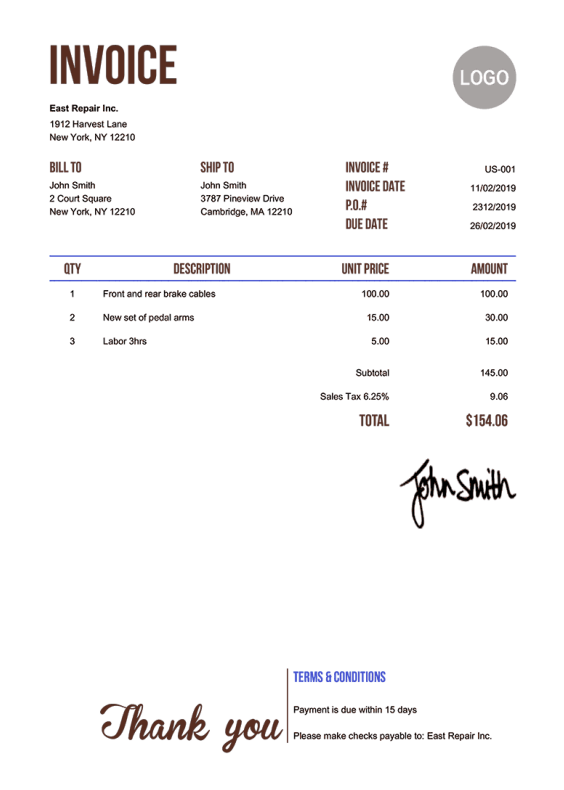

In [4]:
from transformers import pipeline
from matplotlib import pyplot as plt
import cv2

def show_invoice():
  !wget "https://templates.invoicehome.com/invoice-template-us-neat-750px.png"
  img_color = cv2.imread('invoice-template-us-neat-750px.png',1)
  plt.figure(figsize=(10,10))
  plt.imshow(img_color)
  plt.axis("off")
  plt.show()


Setup the pipeline for image Q&A and show the invoice image

--2023-05-01 10:43:59--  https://templates.invoicehome.com/invoice-template-us-neat-750px.png
Resolving templates.invoicehome.com (templates.invoicehome.com)... 18.172.122.55, 18.172.122.70, 18.172.122.5, ...
Connecting to templates.invoicehome.com (templates.invoicehome.com)|18.172.122.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24463 (24K) [image/png]
Saving to: ‘invoice-template-us-neat-750px.png.1’

invoice-template-us 100%[===================>]  23.89K  --.-KB/s    in 0.001s  

2023-05-01 10:43:59 (16.7 MB/s) - ‘invoice-template-us-neat-750px.png.1’ saved [24463/24463]



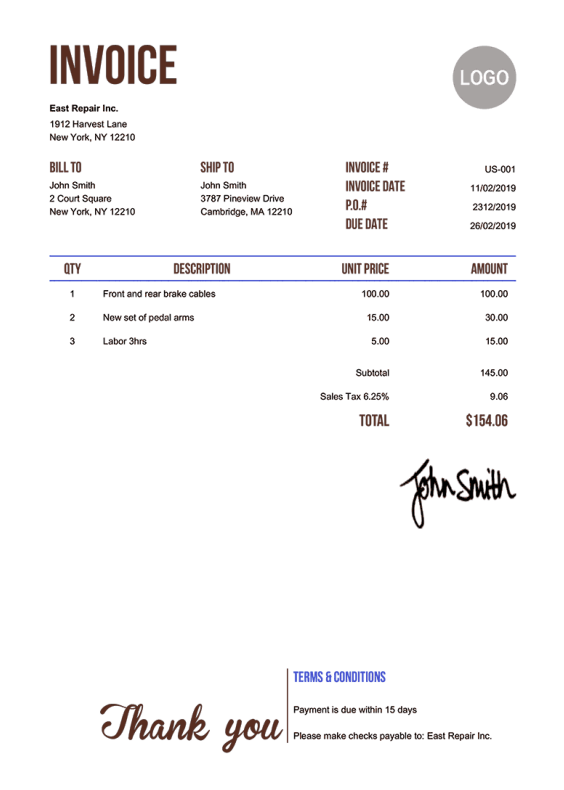

In [5]:
nlp = pipeline(
    "document-question-answering",
    model="impira/layoutlm-document-qa",
)

show_invoice()


Execute Natural language queries and get answers from image. The "document-question-answering" pipeline from HuggingFace transformers library makes use of tesseract (OCR) on the background, extracts the text from the image and then answers the question.

See the confidence scores in the output for quality of answers.

In [6]:
print(nlp(
    "https://templates.invoicehome.com/invoice-template-us-neat-750px.png",
    "What is the invoice number?"
))

print(nlp(
    "https://templates.invoicehome.com/invoice-template-us-neat-750px.png",
    "What is the total amount?"
))

print(nlp(
    "https://templates.invoicehome.com/invoice-template-us-neat-750px.png",
    "What is the unit cost of front and rear brake cable?"
))

print(nlp(
    "https://templates.invoicehome.com/invoice-template-us-neat-750px.png",
    "What is the Due date?"
))

[{'score': 0.42514568567276, 'answer': 'us-001', 'start': 16, 'end': 16}]
[{'score': 0.6581295728683472, 'answer': '$154.06', 'start': 75, 'end': 75}]
[{'score': 0.9978335499763489, 'answer': '100.00', 'start': 54, 'end': 54}]
[{'score': 0.9999239444732666, 'answer': '26/02/2019', 'start': 42, 'end': 42}]


Applications: Data Entry Automation, Accessibility

## Example 15: Table Query

This Tapex model from microsoft is good for building FAQ chatbots.

In [7]:
!git clone https://github.com/rkandas/aibootcampdata.git


Cloning into 'aibootcampdata'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 1), reused 8 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), 12.98 MiB | 11.05 MiB/s, done.


In [8]:
from transformers import TapasTokenizer, TapexTokenizer, BartForConditionalGeneration
import pandas as pd
import datetime
import torch


model_name = "microsoft/tapex-large-finetuned-wtq"
model = BartForConditionalGeneration.from_pretrained(model_name)
tokenizer = TapexTokenizer.from_pretrained(model_name)
table = pd.read_csv("./aibootcampdata/Radar_datatable.csv", delimiter=",")
table = table.astype(str)

def execute_query(query):
    a = datetime.datetime.now()

    encoding = tokenizer(table=table, query=query, padding=True, return_tensors="pt",truncation=True)
    outputs = model.generate(**encoding)
    ans = tokenizer.batch_decode(outputs, skip_special_tokens=True)


    query_result = {
        "query": query,
        "answer": ans
    }

    b = datetime.datetime.now()
    print(query_result)
    return query_result



In [11]:
execute_query(["Which Quadrant BentoML is in?"])
execute_query(["What is the description of Astro?"])
execute_query(["What is the shorturl for Apache Superset?"])

{'query': ['Which Quadrant BentoML is in?'], 'answer': [' languages & frameworks']}
{'query': ['What is the description of Astro?'], 'answer': [" it's hard to believe, but in 2022"]}
{'query': ['What is the shorturl for Apache Superset?'], 'answer': [' https://tinyurl.com/2hkz9jql']}


{'query': ['What is the shorturl for Apache Superset?'],
 'answer': [' https://tinyurl.com/2hkz9jql']}

## Example 16: Image Captioning

Image captioning is a good accessibility tool. If we apply in the right domain, This will help vision impaired users to a great extent.

Salesforce has lot of good models in HuggingFace. Please explore them at https://huggingface.co/models?search=salesforce

In [12]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")


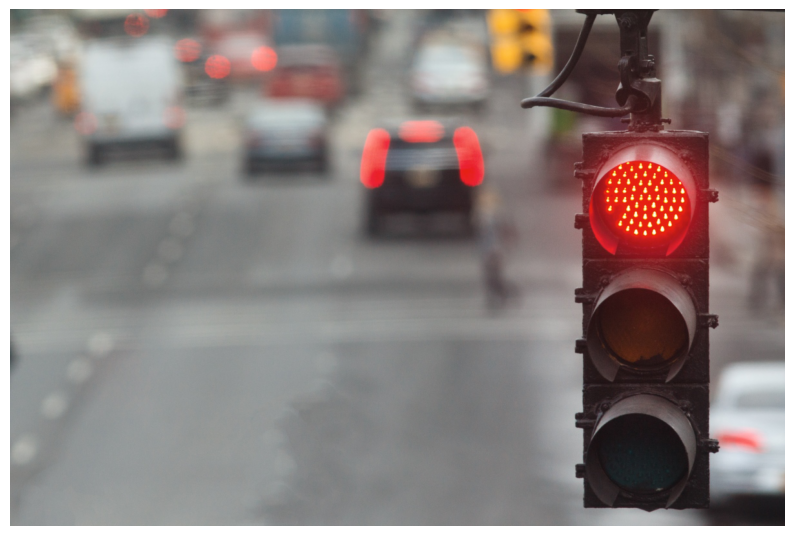

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a photography of a traffic light on a city street
a traffic light on a street with cars in the background


In [13]:
img_url = 'https://scwcontent.affino.com/AcuCustom/Sitename/DAM/016/traffic_lights_Adobe.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

plt.figure(figsize=(10,10))
plt.imshow(raw_image)
plt.axis("off")
plt.show()

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))


## Example 17: Visual Q&A
Image perception and answering from image. Again if implemented properly this will boost accessibility for vision impaired.

In [14]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering

processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

In [15]:
img_url = 'https://scwcontent.affino.com/AcuCustom/Sitename/DAM/016/traffic_lights_Adobe.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

question = "Is the signal green?"
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
print(question, processor.decode(out[0], skip_special_tokens=True))

question = "Is the signal Red?"
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
print(question, processor.decode(out[0], skip_special_tokens=True))


Is the signal green? no
Is the signal Red? yes


## Example 18: A better code generator

Saleforce's codegen models are purpose tuned for code generation and they do a much better job than dolly v2. Good IDE plug-ins can be built with these simple and smaller models as they can run local.

In [18]:
from transformers import AutoTokenizer, AutoModelForCausalLM
tokenizer = AutoTokenizer.from_pretrained("Salesforce/codegen-350M-mono")
tokenizer.pad_token_id = tokenizer.eos_token_id
model = AutoModelForCausalLM.from_pretrained("Salesforce/codegen-350M-mono")

In [19]:
text = "# write a python program to print fibonacci numbers until 100\ndef print_fibonacci():"
input_ids = tokenizer(text, return_tensors="pt").input_ids
attention_mask = torch.ones_like(input_ids)
generated_ids = model.generate(input_ids, attention_mask=attention_mask, max_length=256)
print(tokenizer.decode(generated_ids[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# write a python program to print fibonacci numbers until 100
def print_fibonacci():
    n = int(input("Enter the number of fibonacci numbers you want to print: "))
    for i in range(n):
        print(fibonacci(i))

def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

print_fibonacci()



## Courses

If you want to learn more about Huggingface library and ecosystem, please use the below links

https://huggingface.co/course/chapter1/1

https://www.youtube.com/playlist?list=PLo2EIpI_JMQvWfQndUesu0nPBAtZ9gP1o